# Part 2, Question 5: Python code to import and structure into useful data structures 

In [1]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/Apple_Inc."
# Read with two header rows to preserve structure
tables = pd.read_html(url, match="Fiscal year", header=[0,1])
business_trends = tables[0]


In [2]:
# Flatten to use the second-level names
business_trends.columns = business_trends.columns.get_level_values(1).tolist()
print("Flattened columns:", business_trends.columns.tolist())


Flattened columns: ['Fiscal year', 'Total revenue[c] (US$ b)', 'iPhone revenue (US$ b)', 'Mac revenue (US$ b)', 'iPad revenue (US$ b)', 'Wearables, Home, and Accessories revenue (US$ b)', 'Services revenue (US$ b)', 'Net profit[d] (US$\xa0b)', 'Number of employees (k, FTE)', 'Ref.']


In [3]:
df = business_trends.copy()

# Remove unnecessary column
if 'Ref.' in df.columns:
    df = df.drop(columns=['Ref.'])

# Keep valid rows and convert year to integer
df = df[df['Fiscal year'].astype(str).str.isdigit()]
df['Fiscal year'] = df['Fiscal year'].astype(int)

# Clean numeric columns
for col in df.columns:
    if col != 'Fiscal year':
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(r'[^0-9\.\-]', "", regex=True)
            .replace("", pd.NA)
            .astype(float)
        )

print(df.head())
print(df.dtypes)


   Fiscal year  Total revenue[c] (US$ b)  iPhone revenue (US$ b)  \
0         2011                     108.0                    45.9   
1         2012                     156.0                    78.6   
2         2013                     170.0                    91.2   
3         2014                     182.0                   101.0   
4         2015                     233.0                   155.0   

   Mac revenue (US$ b)  iPad revenue (US$ b)  \
0                 21.7                  19.1   
1                 23.2                  30.9   
2                 21.4                  31.9   
3                 24.0                  30.2   
4                 25.4                  23.2   

   Wearables, Home, and Accessories revenue (US$ b)  Services revenue (US$ b)  \
0                                              11.9                       9.3   
1                                              10.7                      12.8   
2                                              10.1        

In [4]:
df

,Fiscal year,Total revenue[c] (US$ b),iPhone revenue (US$ b),Mac revenue (US$ b),iPad revenue (US$ b),"Wearables, Home, and Accessories revenue (US$ b)",Services revenue (US$ b),Net profit[d] (US$ b),"Number of employees (k, FTE)"
0,2011,108.0,45.9,21.7,19.1,11.9,9.3,25.9,60.4
1,2012,156.0,78.6,23.2,30.9,10.7,12.8,41.7,72.8
2,2013,170.0,91.2,21.4,31.9,10.1,16.0,37.0,80.3
3,2014,182.0,101.0,24.0,30.2,8.3,18.0,39.5,92.6
4,2015,233.0,155.0,25.4,23.2,10.0,19.9,53.3,110.0
5,2016,215.0,136.0,22.8,20.6,11.1,24.3,45.6,116.0
6,2017,229.0,139.0,25.5,18.8,12.8,32.7,48.3,123.0
7,2018,265.0,164.0,25.1,18.3,17.3,39.7,59.3,132.0
8,2019,260.0,142.0,25.7,21.2,24.4,46.2,55.2,137.0
9,2020,274.0,137.0,28.6,23.7,30.6,53.7,57.4,147.0


In [5]:
# Clean column names: remove footnotes and normalize spaces
df.columns = (
    df.columns
    .str.replace(r"\[.*?\]", "", regex=True)     # Remove brackets and content
    .str.replace("\xa0", " ", regex=False)       # Replace non-breaking space
    .str.strip()                                 # Trim whitespace ends
)

print("Cleaned column names:", df.columns.tolist())


Cleaned column names: ['Fiscal year', 'Total revenue (US$ b)', 'iPhone revenue (US$ b)', 'Mac revenue (US$ b)', 'iPad revenue (US$ b)', 'Wearables, Home, and Accessories revenue (US$ b)', 'Services revenue (US$ b)', 'Net profit (US$ b)', 'Number of employees (k, FTE)']


In [6]:
df

,Fiscal year,Total revenue (US$ b),iPhone revenue (US$ b),Mac revenue (US$ b),iPad revenue (US$ b),"Wearables, Home, and Accessories revenue (US$ b)",Services revenue (US$ b),Net profit (US$ b),"Number of employees (k, FTE)"
0,2011,108.0,45.9,21.7,19.1,11.9,9.3,25.9,60.4
1,2012,156.0,78.6,23.2,30.9,10.7,12.8,41.7,72.8
2,2013,170.0,91.2,21.4,31.9,10.1,16.0,37.0,80.3
3,2014,182.0,101.0,24.0,30.2,8.3,18.0,39.5,92.6
4,2015,233.0,155.0,25.4,23.2,10.0,19.9,53.3,110.0
5,2016,215.0,136.0,22.8,20.6,11.1,24.3,45.6,116.0
6,2017,229.0,139.0,25.5,18.8,12.8,32.7,48.3,123.0
7,2018,265.0,164.0,25.1,18.3,17.3,39.7,59.3,132.0
8,2019,260.0,142.0,25.7,21.2,24.4,46.2,55.2,137.0
9,2020,274.0,137.0,28.6,23.7,30.6,53.7,57.4,147.0


# Part 2, Question 6: exploratory data analysis of sample data

## Time Series Plots

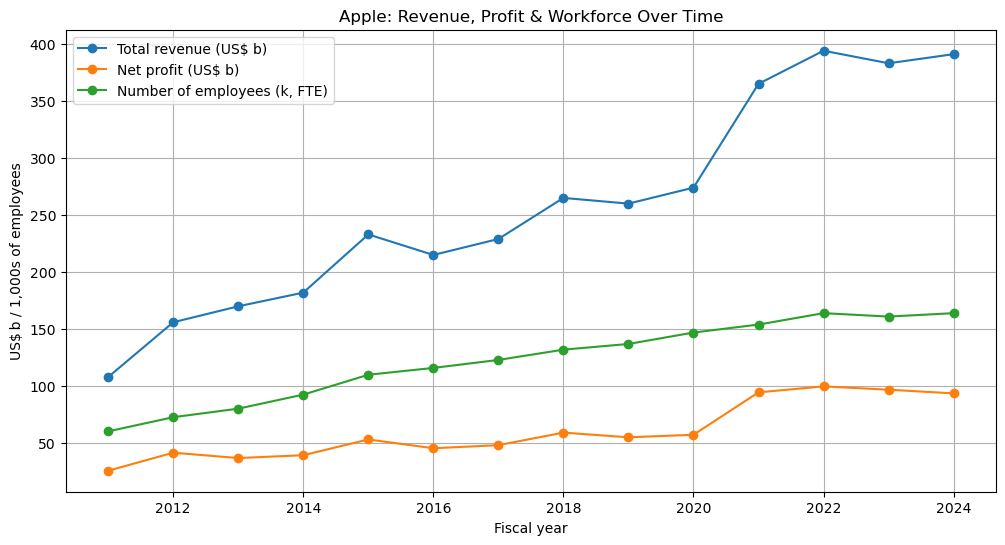

In [7]:
assert 'Total revenue (US$ b)' in df.columns
assert 'Net profit (US$ b)' in df.columns
assert 'Number of employees (k, FTE)' in df.columns

import matplotlib.pyplot as plt

df.plot(
    x='Fiscal year',
    y=['Total revenue (US$ b)', 'Net profit (US$ b)', 'Number of employees (k, FTE)'],
    marker='o',
    figsize=(12, 6)
)
plt.title('Apple: Revenue, Profit & Workforce Over Time')
plt.ylabel('US$ b / 1,000s of employees')
plt.grid(True)
plt.show()


## Growth Rates

In [8]:
df['YoY Revenue %'] = df['Total revenue (US$ b)'].pct_change() * 100
df['YoY Profit %']  = df['Net profit (US$ b)'].pct_change() * 100
df['YoY Employees %'] = df['Number of employees (k, FTE)'].pct_change() * 100

print(df[['Fiscal year', 'YoY Revenue %', 'YoY Profit %', 'YoY Employees %']].round(1))


    Fiscal year  YoY Revenue %  YoY Profit %  YoY Employees %
0          2011            NaN           NaN              NaN
1          2012           44.4          61.0             20.5
2          2013            9.0         -11.3             10.3
3          2014            7.1           6.8             15.3
4          2015           28.0          34.9             18.8
5          2016           -7.7         -14.4              5.5
6          2017            6.5           5.9              6.0
7          2018           15.7          22.8              7.3
8          2019           -1.9          -6.9              3.8
9          2020            5.4           4.0              7.3
10         2021           33.2          64.8              4.8
11         2022            7.9           5.5              6.5
12         2023           -2.8          -2.9             -1.8
13         2024            2.1          -3.3              1.9


## Compare Growth Visually

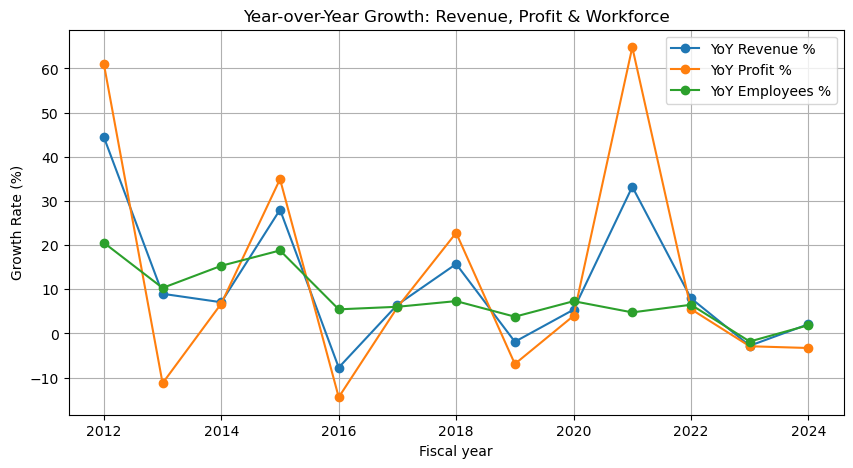

In [9]:
df.plot(
    x='Fiscal year',
    y=['YoY Revenue %', 'YoY Profit %', 'YoY Employees %'],
    marker='o',
    figsize=(10, 5)
)
plt.title('Year-over-Year Growth: Revenue, Profit & Workforce')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


## Structural Breaks or Notable Insights

In [10]:
df_growth = df.dropna()
print("Max revenue spike:", df_growth.loc[df_growth['YoY Revenue %'].idxmax()][['Fiscal year','YoY Revenue %']])
print("Largest employee growth:", df_growth.loc[df_growth['YoY Employees %'].idxmax()][['Fiscal year','YoY Employees %']])


Max revenue spike: Fiscal year      2012.000000
YoY Revenue %      44.444444
Name: 1, dtype: float64
Largest employee growth: Fiscal year        2012.000000
YoY Employees %      20.529801
Name: 1, dtype: float64


## Shares of Total Revenue

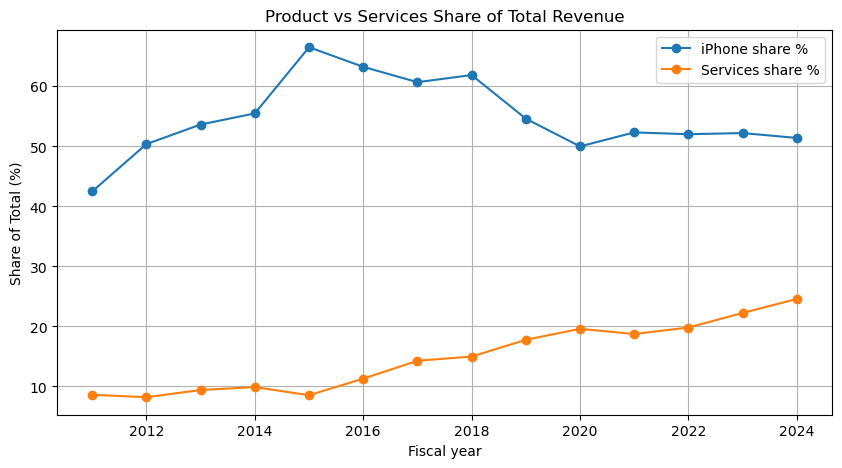

In [11]:
df['iPhone share %'] = df['iPhone revenue (US$ b)'] / df['Total revenue (US$ b)'] * 100
df['Services share %'] = df['Services revenue (US$ b)'] / df['Total revenue (US$ b)'] * 100

df.plot(
    x='Fiscal year',
    y=['iPhone share %', 'Services share %'],
    marker='o',
    figsize=(10, 5)
)
plt.title('Product vs Services Share of Total Revenue')
plt.ylabel('Share of Total (%)')
plt.grid(True)
plt.show()


## Correlation Analysis

                              Total revenue (US$ b)  iPhone revenue (US$ b)  \
Total revenue (US$ b)                      1.000000                0.962735   
iPhone revenue (US$ b)                     0.962735                1.000000   
Services revenue (US$ b)                   0.965094                0.876281   
Number of employees (k, FTE)               0.957288                0.948406   

                              Services revenue (US$ b)  \
Total revenue (US$ b)                         0.965094   
iPhone revenue (US$ b)                        0.876281   
Services revenue (US$ b)                      1.000000   
Number of employees (k, FTE)                  0.922479   

                              Number of employees (k, FTE)  
Total revenue (US$ b)                             0.957288  
iPhone revenue (US$ b)                            0.948406  
Services revenue (US$ b)                          0.922479  
Number of employees (k, FTE)                      1.000000  


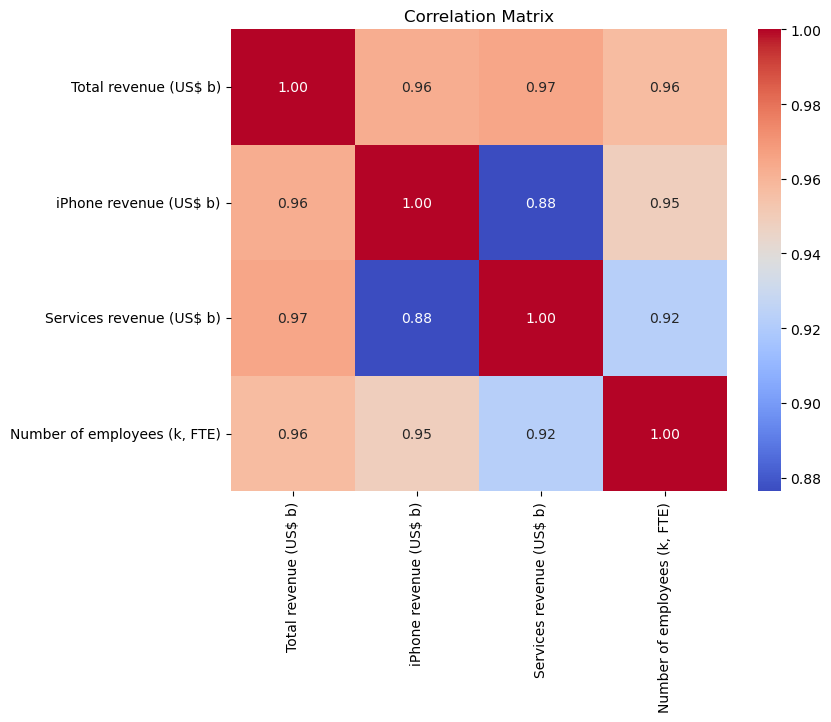

In [13]:
corr = df[['Total revenue (US$ b)', 'iPhone revenue (US$ b)', 'Services revenue (US$ b)', 'Number of employees (k, FTE)']].corr()
print(corr)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [47]:
import numpy as np

def calc_cagr(start, end, periods):
    return (end/start)**(1/periods) - 1

periods = df['Fiscal year'].max() - df['Fiscal year'].min()
cagr_rev = calc_cagr(df['Total revenue (US$ b)'].iloc[0], df['Total revenue (US$ b)'].iloc[-1], periods)
cagr_emp = calc_cagr(df['Number of employees (k, FTE)'].iloc[0], df['Number of employees (k, FTE)'].iloc[-1], periods)

print(f"CAGR (Revenue): {cagr_rev:.2%}")
print(f"CAGR (Employees): {cagr_emp:.2%}")


CAGR (Revenue): 10.40%
CAGR (Employees): 7.99%
